In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
from sklearn import ensemble
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, precision_recall_curve


In [236]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [237]:
final_df = pd.read_csv('clean_groubyProvider.csv')
target = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv', index_col=0)

In [238]:
final_df.head()

,Provider,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,PHY338032,None_PHY,PHY341578,PHY357120,PHY330576,PHY337425,PHY314027,PHY327046,PHY412132,PHY350277,PHY423534,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,PRV51001,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,0,0,0,0,0,0,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,0,2,0,0,0,0,0,0,0,0,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333


In [239]:
print(final_df.shape)
print(target.shape)

(5410, 45)
(5410, 2)


In [240]:
target.replace({'No':0, 'Yes':1}, inplace=True)
target.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


Text(0, 0.5, 'Frequency')

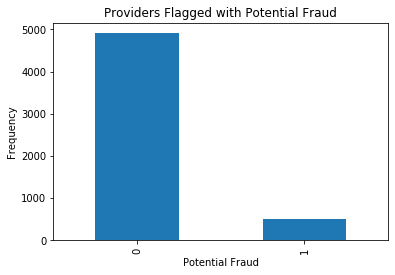

In [253]:
target.value_counts().plot(kind = 'bar')
plt.title("Providers Flagged with Potential Fraud")
plt.xlabel("Potential Fraud")
plt.ylabel("Frequency")

In [244]:
final_df = pd.merge(final_df, target, on='Provider')

In [245]:
final_df.drop('Provider', axis=1, inplace=True)

In [246]:
final_df.head()

,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,PHY338032,None_PHY,PHY341578,PHY357120,PHY330576,PHY337425,PHY314027,PHY327046,PHY412132,PHY350277,PHY423534,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days,PotentialFraud
0,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000,0
1,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,0,0,0,0,0,0,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242,1
2,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530,0
3,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,0,2,0,0,0,0,0,0,0,0,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412,1
4,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333,0


In [247]:
target = final_df['PotentialFraud']
final_df.drop('PotentialFraud', axis=1, inplace=True)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=0)

In [255]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4328, 44), (4328,), (1082, 44), (1082,))

In [256]:
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(n_estimators=50, random_state=10)
randomForest.fit(X_train, y_train)  
randomForest.score(X_train, y_train) 

1.0

In [257]:
y_pred = randomForest.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[974  17]
 [ 50  41]] 

Area Under the Curve: 0.7166975305219503
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       991
           1       0.71      0.45      0.55        91

    accuracy                           0.94      1082
   macro avg       0.83      0.72      0.76      1082
weighted avg       0.93      0.94      0.93      1082
 



### Random Forest with Grid Search Cross Validation

In [258]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [259]:
randomForest2 = ensemble.RandomForestClassifier()
grid_search_forest = ms.GridSearchCV(randomForest2, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 21.1 s, sys: 4.25 s, total: 25.3 s
Wall time: 8min 8s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [260]:
# get the best parameters
grid_search_forest.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 80}

In [261]:
# get the best score
grid_search_forest.best_score_

0.9347656748836386

In [262]:
y_pred = grid_search_forest.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[974  17]
 [ 50  41]] 

Area Under the Curve: 0.7166975305219503
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       991
           1       0.71      0.45      0.55        91

    accuracy                           0.94      1082
   macro avg       0.83      0.72      0.76      1082
weighted avg       0.93      0.94      0.93      1082
 



### Random Forest with Class Weight and Best Parameters from GridSearchCV

#### Random Forest with "balanced" Class Weight
Accuracy: 0.958, Best AUC: 0.810

In [263]:
# Class Weight = 'balanced'
randomForest3 = ensemble.RandomForestClassifier()
randomForest3.set_params(criterion = 'entropy', max_depth = 9, n_estimators = 80, class_weight = 'balanced')
randomForest3.fit(X_train, y_train) # fit 
randomForest3.score(X_train, y_train)



0.958641404805915

In [264]:
y_pred = randomForest3.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[932  59]
 [ 29  62]] 

Area Under the Curve: 0.8108914294585334
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       991
           1       0.51      0.68      0.58        91

    accuracy                           0.92      1082
   macro avg       0.74      0.81      0.77      1082
weighted avg       0.93      0.92      0.92      1082
 



#### Random Forest with "balanced_subsample" Class Weight

In [265]:
# Class Weight = balanced_subsample
# This is the same as “balanced” except that weights are computed based on 
# the bootstrap sample for every tree grown

randomForest4 = ensemble.RandomForestClassifier()
randomForest4.set_params(criterion = 'entropy', max_depth = 9, n_estimators = 80, class_weight = 'balanced_subsample')
randomForest4.fit(X_train, y_train) # fit 
randomForest4.score(X_train, y_train)


0.9604898336414048

In [266]:
y_pred = randomForest4.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[930  61]
 [ 31  60]] 

Area Under the Curve: 0.7988933367339018
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       991
           1       0.50      0.66      0.57        91

    accuracy                           0.91      1082
   macro avg       0.73      0.80      0.76      1082
weighted avg       0.93      0.91      0.92      1082
 



#### Random Forest with Manual Class Weight

In [267]:
target.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [268]:
print(506/4904)
# Class 1 is about 10 times more prevalent than class 0

0.10318107667210441


In [269]:
randomForest5 = ensemble.RandomForestClassifier()
randomForest5.set_params(criterion = 'entropy', max_depth = 9, n_estimators = 80, class_weight = {0:1, 1:10})
randomForest5.fit(X_train, y_train)
randomForest5.score(X_train, y_train)

0.9604898336414048

In [270]:
y_pred = randomForest5.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[930  61]
 [ 31  60]] 

Area Under the Curve: 0.7988933367339018
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       991
           1       0.50      0.66      0.57        91

    accuracy                           0.91      1082
   macro avg       0.73      0.80      0.76      1082
weighted avg       0.93      0.91      0.92      1082
 



### Grid Search with "balanced" Class Weight
'balanced" class weight resulted in the best AUC. To be sure, cross validate with 'balanced' class weight

In [271]:
randomForest6 = ensemble.RandomForestClassifier(class_weight = 'balanced')
grid_search_forest2 = ms.GridSearchCV(randomForest6, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest2.fit(X_train, y_train)


CPU times: user 20.1 s, sys: 1.69 s, total: 21.8 s
Wall time: 7min 58s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [272]:
grid_search_forest2.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 80}

In [273]:
grid_search_forest2.best_score_

0.9330970430998378

In [274]:
y_pred = grid_search_forest2.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[974  17]
 [ 50  41]] 

Area Under the Curve: 0.7166975305219503
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       991
           1       0.71      0.45      0.55        91

    accuracy                           0.94      1082
   macro avg       0.83      0.72      0.76      1082
weighted avg       0.93      0.94      0.93      1082
 



### Feature Importance from Model with Best AUC Score
###### randomForest3.set_params(criterion = 'entropy', max_depth = 9, n_estimators = 80, class_weight = 'balanced')
###### Accuracy: 0.958, Best AUC: 0.810

In [275]:
# Showing 20 most important features
feature_importance = list(zip(final_df.columns, randomForest3.feature_importances_))
dtype = [('feature', 'S30'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:20]]

[b'ClmProcedureCode_count',
 b'ClmAdmitDiagnosisCode',
 b'Inpatient',
 b'ClmProcedureCode',
 b'ClmDiagnosisCode_count',
 b'25000_diagcode',
 b'42731_diagcode',
 b'DeductibleAmtPaid',
 b'InscClaimAmtReimbursed',
 b'2449_diagcode',
 b'treatment_days',
 b'ClaimID',
 b'RenalDiseaseIndicator',
 b'claim_Days',
 b'Other_diagcode',
 b'4019_diagcode',
 b'IPAnnualReimbursementAmt',
 b'2724_diagcode',
 b'duplicate',
 b'IPAnnualDeductibleAmt']

Text(0.5, 1.0, 'feature importance')

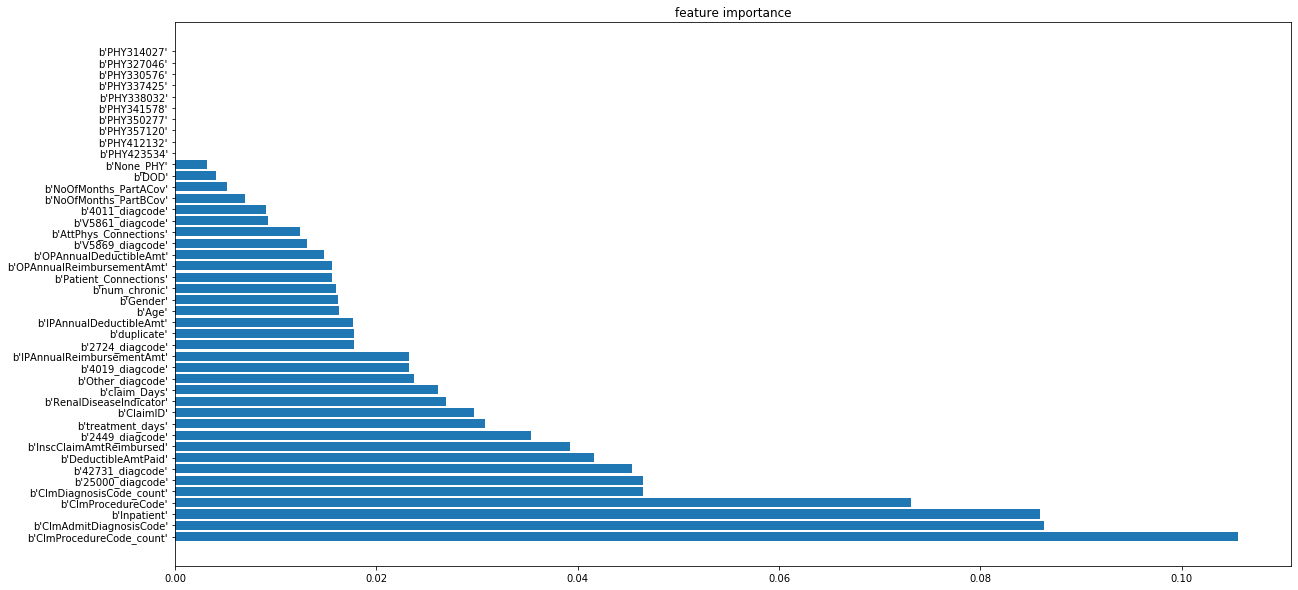

In [276]:
featureNames, featureScores = zip(*list(feature_sort))
plt.figure(figsize=(20,10))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')